# 1 Array manipulation and numpy
Here we will review some of the most important functionality implemented in the ubiquitous `numpy` package. Together with `scipy`, it contains almost anything you may need for standard mathematical calculations.

The first step is importing `numpy`:

In [1]:
import numpy as np

## 1.1 Basic array manipulation

At this point, we can start using `numpy` (invoking it as `np`). Let's use it simply to create an array containing the first 10 integer numbers starting from zero.

In [2]:
a10 = np.arange(10)
print(a10)
print(type(a10))

[0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>


As you can see, `a10` has type `numpy.ndarray`. Numpy arrays are like standard python lists, except they have a lot of "syntactic sugar" (i.e. they can do a lot of cool stuff).

For instance, you can very easily read off slices of them, or skip every second element of them, or loop over them backwards. You can also multiply them by scalars.

In [3]:
# Evaluate one element
print(a10[0])
# Pick a slice of the array
print(a10[0:3])
print(a10[:3])
# A slice that starts at 2
print(a10[2:8])
# Print every second element
print(a10[::2])
# ... but starting from 1
print(a10[1::2])
# Loop backwards
print(a10[::-1])
# Multiply by 2
print(a10 * 2)


0
[0 1 2]
[0 1 2]
[2 3 4 5 6 7]
[0 2 4 6 8]
[1 3 5 7 9]
[9 8 7 6 5 4 3 2 1 0]
[ 0  2  4  6  8 10 12 14 16 18]


OK, how about 2D arrays? You can create any $N$-dimensional array you want. Think of 2D arrays as arrays of 1D arrays. And in general $N$D arrays as arrays of $(N-1)$D arrays.

Let's start by creating a $10\times10$ array, and fill it up with random numbers between 0 and 1.

In [4]:
r2d = np.random.random([10, 10])
print(r2d)

[[0.79979379 0.96705207 0.06128099 0.22854433 0.73192763 0.41937456
  0.1782623  0.97794413 0.05680731 0.843183  ]
 [0.60413821 0.364101   0.72915162 0.5737473  0.72105991 0.09810601
  0.77581305 0.88135307 0.76334853 0.67515411]
 [0.43205602 0.65202057 0.18218893 0.94558106 0.62654463 0.04764921
  0.32979185 0.8233798  0.82472935 0.0190926 ]
 [0.19204877 0.02323458 0.65991542 0.72871065 0.1420881  0.11954028
  0.14115667 0.55823904 0.10604255 0.9995666 ]
 [0.98625319 0.98415233 0.10742474 0.42625157 0.52633958 0.58650384
  0.07953743 0.55481812 0.45495359 0.2630204 ]
 [0.35007328 0.90887595 0.06542818 0.83358817 0.38066532 0.00587661
  0.38246372 0.04253    0.9568474  0.57254692]
 [0.87558222 0.89627819 0.93226157 0.65209454 0.89274501 0.92058049
  0.94300053 0.1980317  0.18146119 0.06050279]
 [0.4985343  0.17947011 0.61830172 0.7072112  0.15909508 0.00897344
  0.76616358 0.36589037 0.18290181 0.16234818]
 [0.43533284 0.56704046 0.10610521 0.73952704 0.21295934 0.74503823
  0.60126067

You can use the same tricks above to select parts of $N$D arrays:

In [5]:
# Select the second row (remember, python arrays start at zero)
print(r2d[1])
# Select the third element in the second row.
print(r2d[1, 2])
# Select the first 2x2 box
print(r2d[:2][:,:2])

[0.60413821 0.364101   0.72915162 0.5737473  0.72105991 0.09810601
 0.77581305 0.88135307 0.76334853 0.67515411]
0.7291516154807666
[[0.79979379 0.96705207]
 [0.60413821 0.364101  ]]


Since looking at a $10\times10$ array can give you a headache easily, let's plot it instead:

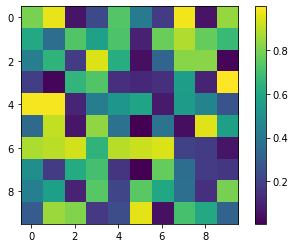

In [7]:
import matplotlib.pyplot as plt
plt.imshow(r2d)
plt.colorbar()
plt.show()

(you'll notice we've imported a new module `matplotlib.pyplot`. This is an awesome library for making figures that we'll make extensive use of here.)

## 1.2 Array operations and broadcasting rules
We will now see some of the magic behind how `numpy` performs operations on arrays of data.

Let's start by creating an array `a10` containing all integers from 0 to 9.

In [8]:
a10 = np.arange(10)
print(a10)

[0 1 2 3 4 5 6 7 8 9]


We can multiply this by two by looping over the full array with a `for` loop. That's fine, but it's extremely slow if you need to do that for a very large array. Instead, you can vectorize (i.e. do in parallel) these operations for `numpy` arrays.

In [9]:
# This is the slowest dumbest way
a20 = np.zeros_like(a10)
for i in range(10):
    a20[i] = a10[i] * 2
print(a20)

# This looks slightly less dumb but it's just as dumb
a20 = np.array([2 * a for a in a10])
print(a20)

# This is the best way:
a20 = 2*a10
print(a20)

[ 0  2  4  6  8 10 12 14 16 18]
[ 0  2  4  6  8 10 12 14 16 18]
[ 0  2  4  6  8 10 12 14 16 18]


The fact that we can multiply an array by a number and `python` understands that we just want to multiply each element of the array by that number is an example of what's called **broadcasting rules**: i.e. operations between different arrays that you can do automatically. [This](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) is a very useful page to read if you're gonna use `numpy`.

For instance, we can multiply two arrays of the same size:

In [10]:
a10_squared = a10 * a10
print(a10)

[0 1 2 3 4 5 6 7 8 9]


You can also multiply all the columns of a 2D array by a 1D array. To show this, let's first create a 10x10 2D array and fill it with ones.

In [11]:
ones_2d = np.ones([10, 10])
print(ones_2d)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


Now let's multiply all its rows by `a10`

In [12]:
a10_rows = ones_2d * a10
print(a10_rows)

[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]]


But now, what if we wanted to multiply all its **columns** by `a10` instead? Broadcasting rules say that the bare multiplication by `a10` will only be applied on the last index of `ones_2d`. If we want it to apply on the first index, we need to give `a10` a fictitious second index. We do this by using `None` as follows:

In [13]:
a10_cols = ones_2d * a10[:, None]
print(a10_cols)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
 [7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]]


And we can do this logic, for example, to compute the outer product of two vectors. The outer product of vector ${\bf v}$ and vector ${\bf w}$ is defined as the matrix ${\bf O}$ that has as indices $O_{ij} = v_i w_j$. In matrix form, we could write this as ${\bf O} = {\bf v} \cdot {\bf w}^T$.

How do we do this with python? Again, you can do it the dumb way, with two nested `for` loops, but you can always use fictitious `None` axes. If you've read the page above on broadcasting rules, stare at the following for a while until it makes sense to you. Here we've just computed the outer product of `a10` with itself.

In [14]:
a10_outer_a10 = a10[None, :] * a10[:, None]
print(a10_outer_a10)

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]]


OK, how about the **inner** product? I.e. the dot-product. This is just defined as the scalar $s = {\bf v}^T\cdot {\bf w}$. This one is actually easier: we just directly multiply the two vectors (they're already broadcastable), and them we sum over the elements of the result:

In [15]:
a10_inner_a10 = np.sum(a10 * a10)
print(a10_inner_a10)

285


Finally how about a generalized dot product? I.e. an operation of of the form ${\bf v}^T\cdot {\bf A}\cdot{\bf w}$, where ${\bf A}$ is a symmetric, positive-definite matrix.

This is easy once you realise that you can tell the `np.sum` function which dimension to sum over through the `axis` keyword (otherwise it will sum all elements over all dimensions). Let's do this here for a matrix ${\bf A}$ which is zero everywhere and random positive numbers in the diagonal:

This is A:


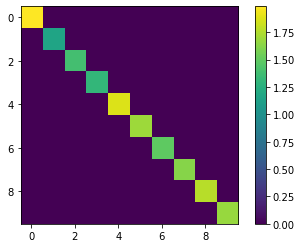

This is a10^T . A . a10:
473.56699414490197
473.56699414490197


In [16]:
A_mat = np.diag(1+np.random.rand(10))
print("This is A:")
plt.imshow(A_mat)
plt.colorbar()
plt.show()

# Now let's compute the generalized dot product:
# First, let's do A . a10:
A_a10 = np.sum(A_mat * a10, axis=0)
# And now, let's compute the dot product of the result with a10:
a10_A_a10 = np.sum(a10 * A_a10)
# Note that you could have done this in one go:
a10_A_a10_faster = np.sum(a10 * np.sum(A_mat * a10, axis=0))

print("This is a10^T . A . a10:")
print(a10_A_a10)
print(a10_A_a10_faster)

Finally, before we move on, it's useful to know about the `flatten` and `reshape` methods, associated with numpy arrays.
* `flatten` returns a 1-D version of any N-dimensional array by just concatenating all rows of the array together.
* `reshape` allows you to turn a 4D $N\times M\times P\times Q$ array into a 2D $N M\times P Q$ array, or a 3D $N M\times P\times Q$ array, or a 5D $\sqrt{N}\times\sqrt{N}\times M\times P \times Q$ array, or ... you get the idea.

In [18]:
# Let's create a 12-element array filled with integers
a1x12 = np.arange(12)
print('1x12:\n', a1x12)

# Let's now turn it into a 3x4 array:
a3x4 = a1x12.reshape([3, 4])
print('3x4:\n', a3x4)

# Let's now turn it into a 2x3x2 array:
a2x3x2 = a1x12.reshape([2, 3, 2])
print('2x3x2:\n', a2x3x2)

# And back again to 1D
a1x12b = a2x3x2.flatten()
print('1x12 again:\n', a1x12b)

1x12:
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
3x4:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
2x3x2:
 [[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
1x12 again:
 [ 0  1  2  3  4  5  6  7  8  9 10 11]


## 1.3 Numpy's extensive syntactic sugar
This section is just meant to deliver one message: "there's probably a `numpy` function for whatever simple operation you want to do". Now, this isn't always the case, but it often is, so it's worth checking out the documentation (or just googling things like "numpy outer product") before 
you throw yourself into writing for-loops or complicated array operations.

So, here's how you do outer and inner products:

In [19]:
a10_outer_a10_b = np.outer(a10, a10)
a10_inner_a10_b = np.dot(a10, a10)
a10_A_a10_b = np.dot(a10, np.dot(A_mat, a10))

print(a10_outer_a10_b)
print(a10_inner_a10_b, a10_inner_a10)
print(a10_A_a10_b, a10_A_a10)

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]]
285 285
473.56699414490197 473.56699414490197


In fact, `numpy` has a magic function called `einsum`, that helps carry out complicated index operations seamlessly. 

The following five lines show how to compute:
* The inner product ${\bf v}^T \cdot {\bf w}$
* The outer product ${\bf v} \cdot {\bf w}^T$
* A matrix-vector product ${\bf A}\cdot{\bf v}$
* A vector-matrix product ${\bf v}^T\cdot{\bf A}$
* A vector-matrix-vector product (i.e. a generalised dot product): ${\bf v}^T\cdot{\bf A}\cdot{\bf w}$

In [20]:
a10_inner_a10 = np.einsum('i,i', a10, a10)
a10_outer_a10 = np.einsum('i,j', a10, a10)
A_a10 = np.einsum('ij,j', A_mat, a10)
a10_A = np.einsum('i,ij', a10, A_mat)
a10_A_a10 = np.einsum('i,ij,j', a10, A_mat, a10)

print(a10_inner_a10)
print(a10_outer_a10)
print(A_a10)
print(a10_A)
print(a10_A_a10)

285
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]]
[ 0.          1.16217068  2.78321415  3.93427578  7.51673066  8.4744564
  8.9562552  11.39252121 14.15780502 15.09430482]
[ 0.          1.16217068  2.78321415  3.93427578  7.51673066  8.4744564
  8.9562552  11.39252121 14.15780502 15.09430482]
473.56699414490197
